In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

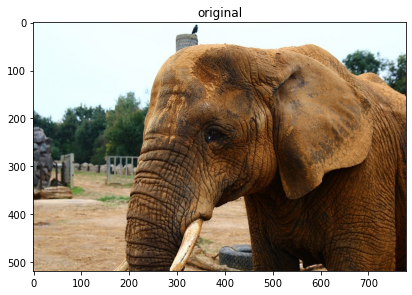

Running our Single Shot Detector on our image...


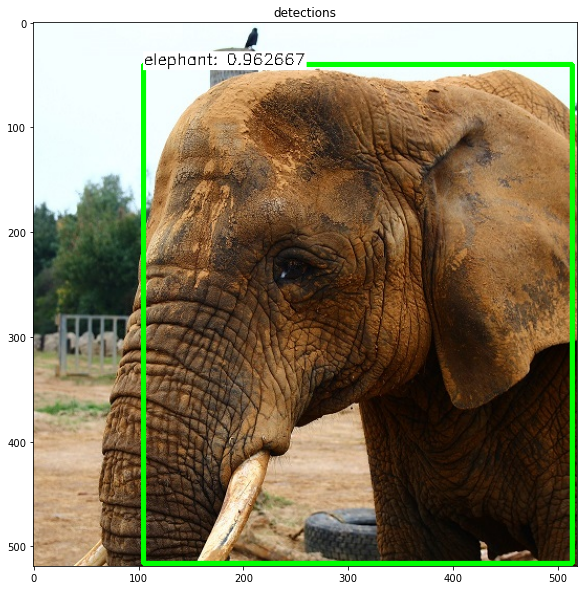

In [5]:
frame = cv2.imread('../images/images/elephant.jpg')
#frame = cv2.imread('./images/Volleyball.jpeg')
#frame = cv2.imread('./images/coffee.jpg')
#frame = cv2.imread('./images/hilton.jpeg')
#frame = cv2.imread('../images/images/tommys_beers.jpeg')
imshow("original", frame)

print("Running our Single Shot Detector on our image...")
# Make a copy of our loaded image
image = frame.copy()

# Set the widths and heights that are needed for input into our model
inWidth = 300
inHeight = 300
WHRatio = inWidth / float(inHeight)

# These are needed for our preprocessing of our image
inScaleFactor = 0.007843
meanVal = 127.5

# Point to the paths of our weights and  model architecture in a protocol buffer 
prototxt = "../SSDs/SSDs/ssd_mobilenet_v1_coco.pbtxt"
weights = "../SSDs/SSDs/frozen_inference_graph.pb"

# Number of classes 
num_classes = 90

# Probality Threshold
thr = 0.5

net = cv2.dnn.readNetFromTensorflow(weights, prototxt)

swapRB = True
classNames = { 0: 'background',
    1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
    7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
    13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
    18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
    24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
    32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
    37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
    41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
    46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
    51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
    56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
    61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
    67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
    75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
    80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
    86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush' }

# Create our input image blob required for input into our network    
blob = cv2.dnn.blobFromImage(frame, inScaleFactor, (inWidth, inHeight), (meanVal, meanVal, meanVal), swapRB)
net.setInput(blob)

# Pass our input image/blob into the network
detections = net.forward()

# Crop frame if needed as we don't resize our input but take a square input
cols = frame.shape[1]
rows = frame.shape[0]

if cols / float(rows) > WHRatio:
    cropSize = (int(rows * WHRatio), rows)
else:
    cropSize = (cols, int(cols / WHRatio))

y1 = int((rows - cropSize[1]) / 2)
y2 = y1 + cropSize[1]
x1 = int((cols - cropSize[0]) / 2)
x2 = x1 + cropSize[0]
frame = frame[y1:y2, x1:x2]

cols = frame.shape[1]
rows = frame.shape[0]
LABELS = ["null","plate"] 
# Iterate over every detection
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    # Once confidence is greater than the threshold we get our bounding box
    if confidence > thr:
        class_id = int(detections[0, 0, i, 1])

        xLeftBottom = int(detections[0, 0, i, 3] * cols)
        yLeftBottom = int(detections[0, 0, i, 4] * rows)
        xRightTop   = int(detections[0, 0, i, 5] * cols)
        yRightTop   = int(detections[0, 0, i, 6] * rows)

        # Draw our bounding box over our image 
        cv2.rectangle(frame, (xLeftBottom, yLeftBottom), (xRightTop, yRightTop),
                      (0, 255, 0), 3)
        # Get our class names and put them on our image (using a white background)
        if class_id in classNames:
            label = classNames[class_id] + ": " + str(confidence)
            labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

            yLeftBottom = max(yLeftBottom, labelSize[1])
            cv2.rectangle(frame, (xLeftBottom, yLeftBottom - labelSize[1]),
                                 (xLeftBottom + labelSize[0], yLeftBottom + baseLine),
                                 (255, 255, 255), cv2.FILLED)
            cv2.putText(frame, label, (xLeftBottom, yLeftBottom),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

# Show our detections
imshow("detections", frame)

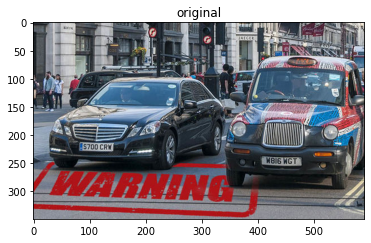

Running our Single Shot Detector on our image...
[INFO] plate: 98.57%
left:[] top:[] right:[] bottom:[]
[INFO] plate: 59.31%
left:[407.2012788057327] top:[238.08818459510803] right:[471.72190845012665] bottom:[257.10434913635254]


-1

In [47]:
frame = cv2.imread('../SSDs/ssd-plate_detection-master/ssd-plate_detection-master/images/img2.jpg')
#frame = cv2.imread('./images/Volleyball.jpeg')
#frame = cv2.imread('./images/coffee.jpg')
#frame = cv2.imread('./images/hilton.jpeg')
#frame = cv2.imread('../images/images/tommys_beers.jpeg')
imshow("original", frame)

print("Running our Single Shot Detector on our image...")
# Make a copy of our loaded image
img = frame.copy()
top = []
left = []
right = []
bottom = []
# Set the widths and heights that are needed for input into our model
inWidth = 300
inHeight = 300
WHRatio = inWidth / float(inHeight)

# These are needed for our preprocessing of our image
inScaleFactor = 0.007843
meanVal = 127.5

# Point to the paths of our weights and  model architecture in a protocol buffer 
prototxt = "../SSDs/ssd-plate_detection-master/ssd-plate_detection-master/model/graph.pbtxt"
weights = "../SSDs/ssd-plate_detection-master/ssd-plate_detection-master/model/frozen_inference_graph.pb"
net = cv2.dnn.readNetFromTensorflow(weights, prototxt)
# Number of classes 
rows = img.shape[0]
cols = img.shape[1]
net.setInput(cv2.dnn.blobFromImage(img, size=(300, 300), swapRB=True, crop=False))
cvOut = net.forward()
LABELS = ["null","plate"]     
for detection in cvOut[0,0,:,:]:
    score = float(detection[2])
    if score > 0.5:
        label = "{}: {:.2f}%".format(LABELS[int(detection[1])], detection[2] * 100)
        print("[INFO] {}".format(label))

        left1 = detection[3] * cols
        top1 = detection[4] * rows
        right1 = detection[5] * cols
        bottom1 = detection[6] * rows
        print("left:{} top:{} right:{} bottom:{}".format(left,top,right,bottom))
        cv2.rectangle(frame, (int(left1), int(top1)), (int(right1), int(bottom1)), (23, 230, 210), thickness=3)
        top.append(top1)
        left.append(left1)
        right.append(right1)
        bottom.append(bottom1)

cv2.imshow('img', frame)
cv2.waitKey()

In [ ]:
cv2.rectangle(img, (int(left), int(top)), (int(right), int(bottom)), (23, 230, 210), thickness=2)

cv2.imshow('img', img)
cv2.waitKey()

N8I6WGT

S700CRY



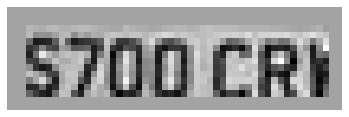

In [49]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

for i in range(len(crp_img)):
    
    carplate_extract_img_gray = cv2.cvtColor(crp_img[i], cv2.COLOR_RGB2GRAY)
    plt.axis('off') 
    plt.imshow(carplate_extract_img_gray, cmap = 'gray');
    carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) # kernel size 3
    plt.axis('off') 
    plt.imshow(carplate_extract_img_gray, cmap = 'gray');
    print(pytesseract.image_to_string(carplate_extract_img_gray, 
                                      config = f'--psm 6 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

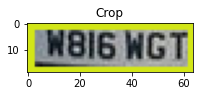

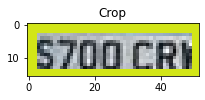

In [48]:
crp_img = []
for i in range(len(top)):
    cropped_image = frame[int(top[i]):int(bottom[i]),int(left[i]):int(right[i])]
    imshow('Crop',cropped_image)
    crp_img.append(cropped_image)

In [3]:
image = cv2.polylines(image, [pts],
                      isClosed, color, thickness)

AttributeError: 'NoneType' object has no attribute 'shape'

In [28]:
len(top)

2

In [40]:
len(crp_img)

2

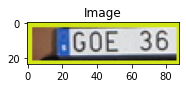

In [42]:
imshow('Image',crp_img[1])